# Linear regression

### Introduction
- Regression is to do with "relationship between variables".
- For example, is humidity ($H$) is related with the temperature ($T$) in this room?   
- Assume we do experiments, and from the data, we propose a linear hypothesis : $H\propto T$.
- Ofcourse there can be other possible models that can be considered such as approximating by a Fourier series, or by higher degree polynomial and so on.
- Regression also determine "strength" or "significance" of relationship.
- Regression vs. Curve Fitting.


### Steps

- Propose a regression model (assumptions).
- Interpret how "significant" is the regression model. Define a quantitative criteria.
- Check the assumptions, and go to step one.

Thus linear regression analysis also introduces us to framework of hypothesis testing.

### Terminology

- "Predictor" or "independent" variable or "stimulus" $(T)$.
- "Dependent" or "response" variable $(H)$. 
- "Positive" and "negative" relationship.
- Regression-line/plane.
- Residual ($H=mT+c\pm\epsilon$). (In general "independent" variables can be more than one).

### Exercise

- ... data set.

In [371]:
import numpy as np

In [372]:
#random dataset

N=100
x=np.linspace(0,1,N)
#print(x)
y=-(np.random.rand(N)+0.5)*x + 2.0
#print(y)

In [373]:
#sales dataset

#import pandas as pd
#data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#X = df_adv[['TV', 'Radio']]
#y = df_adv['Sales']
#df_adv.head()
#print(data)
#x=data['TV']
#y=data['sales']
#N=len(x)

In [374]:
#iris dataset

#data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
#print(data)
#data.set_index('species')
#setosa=data[data['species'].str.contains("setosa")]
#x=setosa['sepal_length']
#y=setosa['petal_length']
#N=len(x)

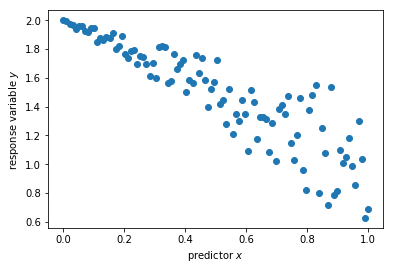

In [375]:
import matplotlib.pyplot as plt

def myplot(x,y,style): 
    plt.plot(x,y,style);
    plt.xlabel('predictor $x$'); 
    plt.ylabel('response variable $y$');
        
myplot(x,y,'o')

In [376]:
m=1.5
c=2.0
Y1=m*x+c
Y2=0.6*x+c
Y3=0.1*x+c

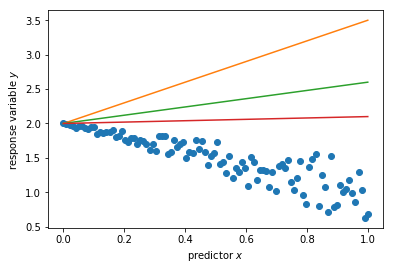

In [377]:
myplot(x,y,'o'); 
myplot(x,Y1,'-'); 
myplot(x,Y2,'-'); 
myplot(x,Y3,'-'); 

### Spread

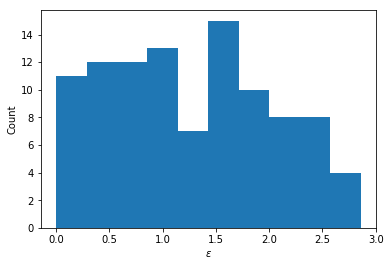

In [378]:
d=Y1-y

def myhist(var,xlabel,ylabel):
    plt.hist(d)
    plt.xlabel(xlabel); 
    plt.ylabel(ylabel)

myhist(d,'$\epsilon$', 'Count')

## First of all, some standard steps on the data

- Centering
- Normalization

- obtain $\bar{x},\bar{y}$

$\bar{x} = \frac{1}{N}\sum_i{x_i}$

$\bar{y} = \frac{1}{N}\sum_i{y_i}$

In [379]:
x_mean = sum(x)/len(x);
y_mean = sum(y)/len(y);

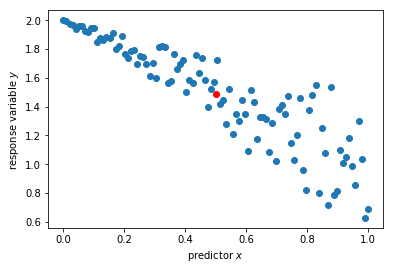

In [380]:
myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or');

## Centering

$x_i = x_i-\bar{x}$

$y_i = y_i-\bar{y}$

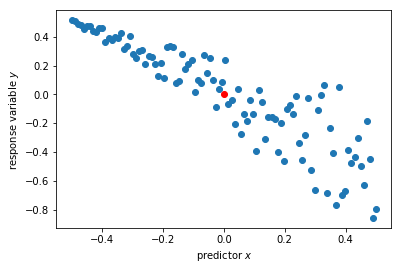

In [381]:
x=x-x_mean;
y=y-y_mean;

x_mean = sum(x)/len(x);
y_mean = sum(y)/len(y);

myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or');

## Normalization/rescaling

This is done to have SD = 1, and mean = 0.

$x_i = \frac{x_i}{SD}$

$y_i = \frac{y_i}{SD}$

1.0
1.0


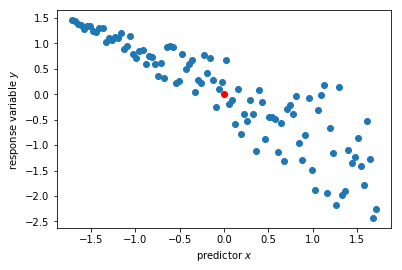

In [382]:
x=x/np.std(x);
y=y/np.std(y);
myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or');

print(np.std(x))
print(np.std(y))


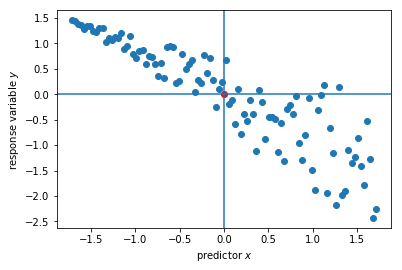

In [383]:
myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or'); 
plt.axvline(x_mean); 
plt.axhline(y_mean);

## Oridinary Least-square

In this method, the sum of squares of the residuals, $\sum_i (Y_i-y_i)^2$, is minimised.

i.e. $
\frac{\partial}{\partial m} \sum_i (Y_i-y_i)^2 = 0
$

$
\frac{\partial}{\partial m} \sum_i (mx_i-y_i)^2 = 0
$

$
\frac{\partial}{\partial m} \sum_i (mx_i-y_i)(mx_i-y_i) = 0
$

$
\frac{\partial}{\partial m} \sum_i (m^2 x_i^2 - 2 m x_i y_i + y_i^2) = 0
$

$
\sum_i (2 m x_i^2 - 2 x_i y_i) = 0
$

$
m=\frac{ \sum_i x_i y_i }
     { \sum_i x_i^2 }
$

Notice that 
$
\frac{\partial^2}{\partial m^2} \sum_i (Y_i-y_i)^2 = \frac{\partial}{\partial m} \sum_i (2 m x_i^2 - 2 x_i y_i) > 0
$, therefore a minimum.

In [384]:
a = sum( (x-x_mean)*(y-y_mean) )
b = sum( (x-x_mean)**2 )
m = a/b
print(m)

-0.900115079796


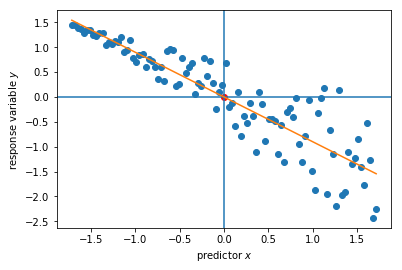

In [385]:
c=0
Y=m*x+c

myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or'); 
plt.axvline(x_mean); 
plt.axhline(y_mean);
myplot(x,Y,'-'); 

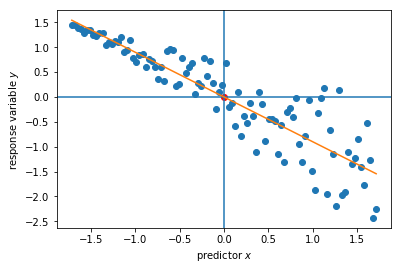

In [386]:
c=y_mean - m*x_mean;

Y=m*x+c

myplot(x,y,'o'); 
myplot(x_mean,y_mean,'or'); 
plt.axvline(x_mean); 
plt.axhline(y_mean);
myplot(x,Y,'-'); 

## Nature of residual

1.66533453694e-16
0.435652204315


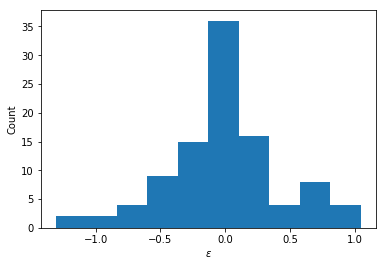

In [387]:
d=Y-y;

myhist(d,'$\epsilon$','Count');

print(np.mean(d))
print(np.std(d))

## Assesing the "strength" of regression model

## $R^2$ approach

$R^2$ is the ratio of the "sum of squares" of the estimated and the actual responses.

if $y_i$ are the actual "outcomes"
and $Y_i$ are the estimated "outcomes"
then
$
R^2 = \frac{\sum(Y_i-\bar{y})^2} {\sum(y_i-\bar{y})^2} = \frac{\text{Regression sum of squares}}{\text{Total/actual sum of squares}} = \frac{\text{Explained variance}}{\text{Total/actual variance}}
$

If $R^2\rightarrow 1$, implies strong relationship.

If $R^2\rightarrow 0$, implies weak relationship.


In [388]:
num = sum( (Y - y_mean)**2 );
den = sum( (y - y_mean)**2 );
R2  = num/den;
print(R2)

0.810207156875


## Standard error of estimate

$\epsilon = \sqrt{\frac{1}{N-2}\sum(Y_i-{y_i})^2}$

$\sum{(Y_i-{y_i})^2}$ is called the $\textbf{residual sum of squares}$.

In [389]:
err = np.sqrt( np.sum( (Y - y)**2 )/(N-2));
print(err)

0.440075182729


## Covariance and correlation

$Covar(x,y) = \frac{1}{n-1}\sum_i{ (x_i-\bar{x})(y_i-\bar{y})}$

$Corr(x,y)  = \frac{Covar(x,y)}{SD_x SD_y}$

where $SD_x$ and $SD_y$ are standard deviations.

- $-1 \leq Corr(x,y) \leq 1$
- $Corr(x,y)$ measures the "strength" of the linear relationship between $x,y$ data, with stronger relationships as $Corr(x,y) \rightarrow$-1 or 1.
- $Corr(x,y) = 0$ implies no linear relationship.

In [390]:
covar = sum((x-x_mean)*(y-y_mean))/(N-1);
print(covar);

corr   = covar/(np.std(x)*np.std(y));
print(corr)

-0.909207151309
-0.909207151309


## Using scipy (stats)

-0.900115079796
0.0440075182729


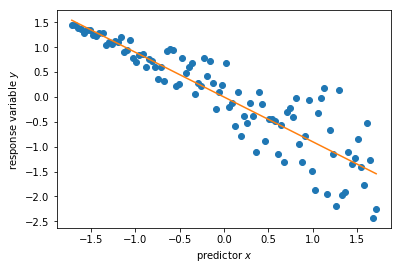

In [391]:
from scipy import stats

m, c, r_value, p_value, std_err = stats.linregress(x,y);
myplot(x,y,'o');
myplot(x,m*x+c,'-');

print(r_value)
print(std_err)

## Using scipy (statsmodels) 

In [392]:
from statsmodels.formula.api import ols
import pandas as pd
data = pd.DataFrame({'x': x, 'y': y});
model = ols("y ~ x", data).fit();
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     418.4
Date:                Mon, 19 Feb 2018   Prob (F-statistic):           3.85e-37
Time:                        13:54:35   Log-Likelihood:                -58.803
No. Observations:                 100   AIC:                             121.6
Df Residuals:                      98   BIC:                             126.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.996e-16      0.044  -1.14e-14      1.0

## Exercise ('Single' predictor regression)

* **Ground cricket chirps**
The following data shows the relationship between chirps per second of a striped ground cricket and the corresponding ground temperature (in ºF)
 *  Determine a linear regression model equation to represent this data.
 * Plot the data and the obtained equation.
 * Decide on the goodness of fit of the model.
 * Extrapolate:  If the ground temperature reached 95º, then at what approximate rate would you expect the crickets to be chirping?
 * Interpolate:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 
 * 	If the ground temperature should drop to freezing (32º F), what happens to the cricket's chirping rate?

In [393]:
chirps_per_second = [20., 16., 19.8, 18.4, 17.1,15.5 ,14.7 ,15.7,15.4 ,16.3 ,15.0 ,17.2,
16.0 ,17.0 ,14.4 ]
temperature = [88.6,71.6,93.3,84.3,80.6,75.2,69.7,71.6,69.4,83.3,79.6,82.6,80.6,83.5,76.3]

## Multiple Regression : Going back to start ----------------------------------------------------------------------

- The humidity can depend on other parameters as well, then

    $H_i = m_1 T_i + m_2 X_{2i} + m_3 X_{3i} + ...$
    
    (changing the notation)

    $Y_i=m_1 X_1 + m_2 X_{2} + m_3 X_{3} + ...$
    
    or
    
    $Y_i=\sum_{k=1}^p m_k X_{ki}$ for $p$ number of predictors.
    
    or
    
    $\mathbf{Y} = \mathbf{m}\mathbf{X}$ in matrix notation.
    
    
- The residual will be

    $\sum_i( Y_i - \sum_{k=1}^p m_k X_{ki} )^2$
    
To minimize the residual,

$
\frac{\partial}{\partial m_k} \sum_i ( Y_i - \sum_{k=1}^p m_k X_{ki} )^2 = 0
$

For example for two predictos ($p=2$)


$
\frac{\partial}{\partial m_1} \sum_i( Y_i - m_1 X_{1i} - m_2 X_{2i})^2 = 0 \\
\implies \sum_i ( X_{1i} Y_i - m_1 X_{1i} X_{1i} - m_2 X_{1i} X_{2i}) = 0 \\
\implies m_1  = \frac { \sum_i ( X_{1i} Y_i - m_2 X_{1i} X_{2i}) }{\sum_i  X_{1i} X_{1i}}
$


$
\frac{\partial}{\partial m_2} \sum_i( Y_i - m_1 X_{1i} - m_2 X_{2i})^2 = 0 \\
\implies \sum_i ( X_{2i} Y_i - m_1 X_{2i} X_{1i} - m_2 X_{2i} X_{2i}) = 0 \\
\implies m_2 = \frac {  \sum_i ( X_{2i} Y_i - m_1 X_{2i} X_{1i}) }{\sum_i X_{2i} X_{2i}}
$

and solve for $m_1$ and $m_2$.

In [394]:
import pandas as pd
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
#X = df_adv[['TV', 'Radio']]
#y = df_adv['Sales']
#df_adv.head()
print(data)


        TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
6      8.7   48.9       75.0    7.2
7     57.5   32.8       23.5   11.8
8    120.2   19.6       11.6   13.2
9      8.6    2.1        1.0    4.8
10   199.8    2.6       21.2   10.6
11    66.1    5.8       24.2    8.6
12   214.7   24.0        4.0   17.4
13    23.8   35.1       65.9    9.2
14    97.5    7.6        7.2    9.7
15   204.1   32.9       46.0   19.0
16   195.4   47.7       52.9   22.4
17    67.8   36.6      114.0   12.5
18   281.4   39.6       55.8   24.4
19    69.2   20.5       18.3   11.3
20   147.3   23.9       19.1   14.6
21   218.4   27.7       53.4   18.0
22   237.4    5.1       23.5   12.5
23    13.2   15.9       49.6    5.6
24   228.3   16.9       26.2   15.5
25    62.3   12.6       18.3    9.7
26   262.9    3.5       19.5   12.0
27   142.9   29.3       12.6

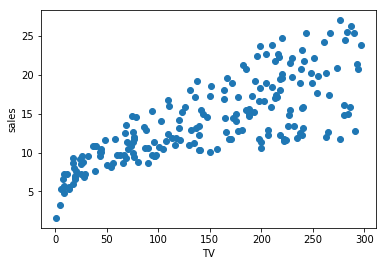

In [395]:
x1=data['TV']
x2=data['radio']
x3=data['newspaper']
y=data['sales']

#print(x1,y)
plt.plot(x1,y,'o'); 
plt.xlabel('TV')
plt.ylabel('sales')

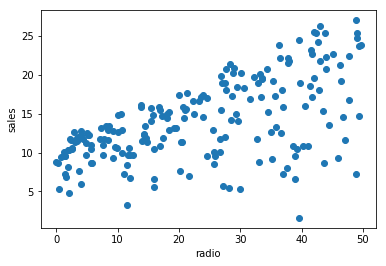

In [396]:
myplot(x2,y,'o'); 
plt.xlabel('radio')
plt.ylabel('sales')

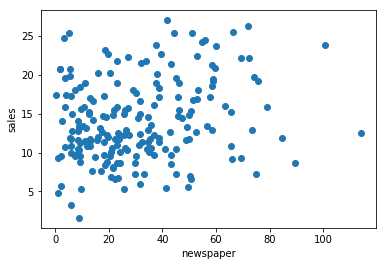

In [397]:
plt.plot(x3,y,'o')
plt.xlabel('newspaper');
plt.ylabel('sales');

## Regression model

$sales = m_0 + m_1 \times TV + m_2 \times radio + m_3 \times newspaper$

m= const    2.921100
TV       0.045755
radio    0.187994
dtype: float64


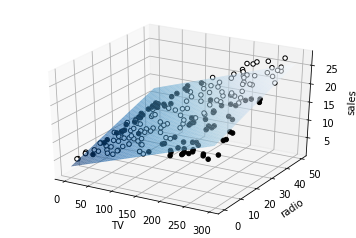

In [398]:
import statsmodels.api as sm

X = data[['TV', 'radio']];
y = data['sales'];

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X);
model  = sm.OLS(y, X).fit();#

print('m=',model.params)

## Create the 3d plot 
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.radio.min(), X.radio.max(), 100));

# plot the hyperplane by evaluating the parameters on the grid
Z = model.params[0] + model.params[1] * xx1 + model.params[2] * xx2;

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8));
#ax = Axes3D(fig, azim=-115, elev=15)


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d');

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.Blues_r, alpha=0.6, linewidth=0);

# plot data points - points over the HP are white, points below are black
resid = y - model.predict(X);
ax.scatter(X[resid >= 0].TV, X[resid >= 0].radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white');
ax.scatter(X[resid < 0].TV, X[resid < 0].radio, y[resid < 0], color='black', alpha=1.0);

# set axis labels
ax.set_xlabel('TV');
ax.set_ylabel('radio');
ax.set_zlabel('sales');

## See model summary

In [399]:
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 19 Feb 2018   Prob (F-statistic):           4.83e-98
Time:                        13:54:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

## Exercise (Multiple regression)

* **Iris dataset **
 - Load 'iris' dataset from seaborn library.
 - You will notice that there are defferent species with their sepal and petal dimensions. For 'setosa' species, create and store the data in a seperate dataframe.
 - Now run a multiple regression model for 'sepal_length' as a output variable and 'sepal_width' and 'petal_width' as predictors.
 - Print the intercept and the slope of the predicted model
 - Calculate the $R^2$ the model.
 - Interpret if there is a correlation.

In [400]:
#iris dataset for multiple regression

#data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")
#print(data)
#data.set_index('species')
#setosa=data[data['species'].str.contains("setosa")]
#x1=setosa['sepal_length']
#x2=setosa['petal_length']
#x3=setosa['petal_length']
#y = data['sepal_length'];
#X = data[['sepal_width', 'petal_width']];

## Appendix


| Element | Description|
|----|----|
| Dep. Variable 	| Which variable is the response in the model|
|Model |	What model you are using in the fit|
|Method |	How the parameters of the model were calculated 
|No. Observations 	|The number of observations (examples)
|DF Residuals |	Degrees of freedom of the residuals. Number of observations – number of parameters
|DF Model |	Number of parameters in the model (not including the constant term if present)

The right part of the first table shows the goodness of fit

|Element |	Description|
|----|----|
|R-squared 	|The coefficient of determination. A statistical measure of how well the regression line approximates the real data points|
|Adj. R-squared |	The above value adjusted based on the number of observations and the degrees-of-freedom of the residuals|
|F-statistic |	A measure how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals|
|Prob (F-statistic) |	The probability that you would get the above statistic, given the null hypothesis that they are unrelated|
|Log-likelihood |	The log of the likelihood function.|
|AIC 	|The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model.
|BIC |	The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters.|

The left part of the table reports for each of the coefficients

|Description|	Name of the term in the model|
|-----------|---------------------|
|coef |	The estimated value of the coefficient|
|std err |	The basic standard error of the estimate of the coefficient. More sophisticated errors are also available.|
|t 	|The t-statistic value. This is a measure of how statistically significant the coefficient is.|
|P > t |	P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.|

|Element 	|Description|
|-----------|---------------------|
|Skewness |	A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line).|
|Kurtosis |	A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails).|
|Omnibus |	D’Angostino’s test. It provides a combined statistical test for the presence of skewness and kurtosis.|
|Prob(Omnibus) |	The above statistic turned into a probability|
|Jarque-Bera |	A different test of the skewness and kurtosis|
|Prob (JB) 	|The above statistic turned into a probability|
|Durbin-Watson |	A test for the presence of autocorrelation (that the errors are not independent.) Often important in time-series analysis|
|Cond. No |	A test for multicollinearity (if in a fit with multiple parameters, the parameters are related with each other).|